In [3]:
#Cell 1
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
# TensorFlow and tf.keras
import tensorflow as tf
import seaborn as sns

#Some scikitlearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import plotly.express as px
# And the usual suspects
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:

aus_rain= pd.read_csv("weatherAUS.csv")
aus_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
aus_rain.shape[0]
# aus_rain['RainToday'].value_counts()[np.nan]

145460

In [6]:
# Drop all NA data set
aus_rain_clean = aus_rain.dropna()
aus_rain_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [7]:
# Removing columns that cannot be correlated
aus_rain_clean.drop(columns=['Date', 'Location','WindGustDir','WindDir9am','WindDir3pm'], inplace=True)

C:\Users\Owen\AppData\Local\Temp\ipykernel_5656\2634429434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_rain_clean.drop(columns=['Date', 'Location','WindGustDir','WindDir9am','WindDir3pm'], inplace=True)


In [8]:
aus_rain_clean['RainToday'] = aus_rain_clean['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
aus_rain_clean['RainTomorrow'] = aus_rain_clean['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
aus_rain_clean.head(150)
# aus_rain_clean['RainToday'].value_counts()[0]

C:\Users\Owen\AppData\Local\Temp\ipykernel_5656\143641080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_rain_clean['RainToday'] = aus_rain_clean['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
C:\Users\Owen\AppData\Local\Temp\ipykernel_5656\143641080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_rain_clean['RainTomorrow'] = aus_rain_clean['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,11.3,13.0,10.0,1.8,0.0,43.0,24.0,20.0,95.0,95.0,1026.5,1023.8,8.0,8.0,11.4,11.9,1,1
6201,11.1,13.9,12.0,0.0,0.0,30.0,15.0,13.0,97.0,97.0,1023.8,1021.6,8.0,8.0,12.6,13.6,1,1
6203,11.6,18.6,0.2,0.6,8.3,26.0,6.0,6.0,97.0,40.0,1020.4,1017.1,7.0,4.0,12.2,17.5,0,0
6204,6.9,17.6,0.0,2.2,9.3,15.0,7.0,11.0,86.0,40.0,1018.4,1015.5,3.0,3.0,10.9,16.6,0,0


Text(0.5, 1.0, 'Prediction whether it will rain tomorrow (3pm data) (Red is yes)')

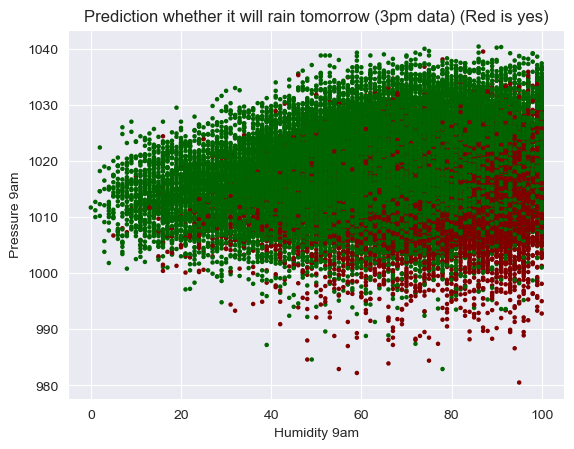

In [9]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Humidity9am'],aus_rain_clean['Pressure9am'],s=5, c=aus_rain_clean['RainTomorrow'],cmap=GnRd)
plt.xlabel('Humidity 9am')
plt.ylabel('Pressure 9am')
plt.title('Prediction whether it will rain tomorrow (3pm data) (Red is yes)')

Text(0.5, 1.0, 'Prediction whether it will rain tomorrow (3pm data) (Red is yes)')

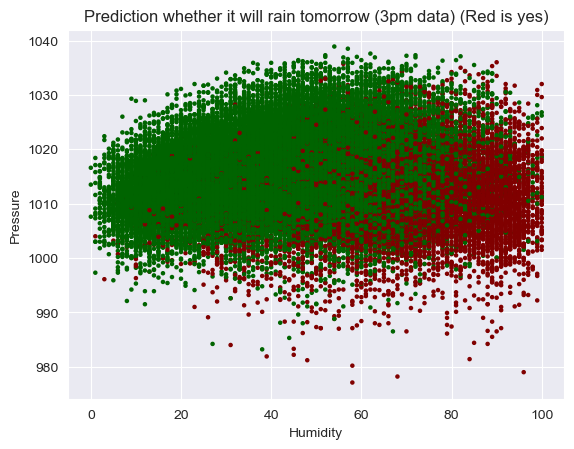

In [10]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Humidity3pm'],aus_rain_clean['Pressure3pm'],s=5, c=aus_rain_clean['RainTomorrow'],cmap=GnRd)
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.title('Prediction whether it will rain tomorrow (3pm data) (Red is yes)')

Text(0.5, 1.0, 'Prediction whether it will rain tomorrow (3pm data) (Red is yes)')

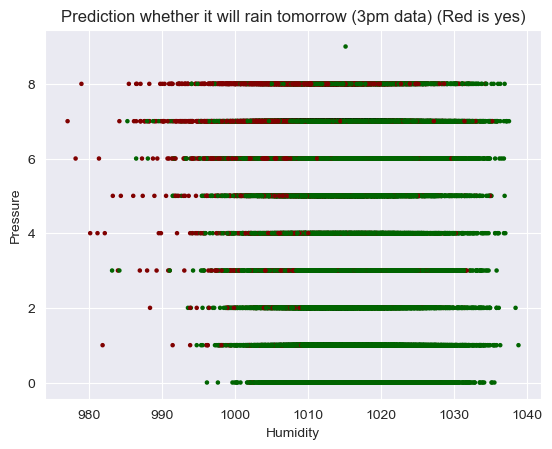

In [11]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Pressure3pm'],aus_rain_clean['Cloud3pm'],s=5, c=aus_rain_clean['RainTomorrow'],cmap=GnRd)
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.title('Prediction whether it will rain tomorrow (3pm data) (Red is yes)')

Text(0.5, 1.0, 'Prediction whether it will rain today (Red is yes)')

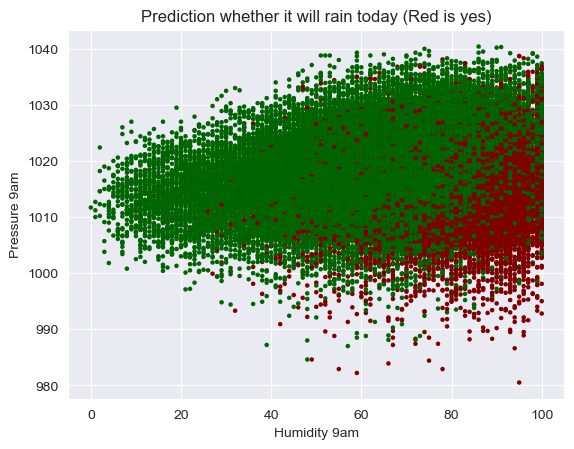

In [12]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Humidity9am'],aus_rain_clean['Pressure9am'],s=5, c=aus_rain_clean['RainToday'],cmap=GnRd)
plt.xlabel('Humidity 9am')
plt.ylabel('Pressure 9am')
plt.title('Prediction whether it will rain today (Red is yes)')

# Analyzing dataset by removing Evaporation and Sunshine First

In [13]:
aus_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
# Removing columns that cannot be correlated

aus_rain_clmod = aus_rain.drop(columns=['Cloud9am', 'Cloud3pm'])
# aus_rain_clean.drop(columns=['Date', 'Location','WindGustDir','WindDir9am','WindDir3pm'], inplace=True)
aus_rain_clmod

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [15]:
aus_rain_clmod.drop(columns=['Date', 'Location','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','Humidity9am','Pressure9am','Temp9am'], inplace=True)
aus_rain_clmod

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,24.0,22.0,1007.1,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,22.0,25.0,1007.8,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,26.0,30.0,1008.7,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,9.0,16.0,1012.8,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,20.0,33.0,1006.0,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,11.0,24.0,1020.3,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,22.0,9.0,21.0,1019.1,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,24.0,1016.8,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,28.0,7.0,24.0,1016.5,26.0,No,No


In [16]:
# Drop all NA data set
aus_rain_clmod = aus_rain_clmod.dropna()
aus_rain_clmod.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,20.0,13.0,1004.4,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,8.0,1012.1,27.0,No,No
6051,15.5,34.1,0.0,12.6,13.3,30.0,7.0,7.0,1011.6,32.7,No,No
6052,19.4,37.6,0.0,10.8,10.6,46.0,15.0,22.0,1009.2,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,22.0,1009.1,35.6,No,No


In [17]:
aus_rain_clmod['RainToday'] = aus_rain_clmod['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
aus_rain_clmod['RainTomorrow'] = aus_rain_clmod['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
aus_rain_clmod

C:\Users\Owen\AppData\Local\Temp\ipykernel_5656\213171423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_rain_clmod['RainToday'] = aus_rain_clmod['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
C:\Users\Owen\AppData\Local\Temp\ipykernel_5656\213171423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_rain_clmod['RainTomorrow'] = aus_rain_clmod['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,20.0,13.0,1004.4,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,8.0,1012.1,27.0,0,0
6051,15.5,34.1,0.0,12.6,13.3,30.0,7.0,7.0,1011.6,32.7,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,15.0,22.0,1009.2,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,22.0,1009.1,35.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,20.0,32.0,1010.5,32.3,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,11.0,28.0,1011.2,32.0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,11.0,23.0,1011.8,32.1,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,17.0,58.0,1010.7,29.2,0,0


<Axes: >

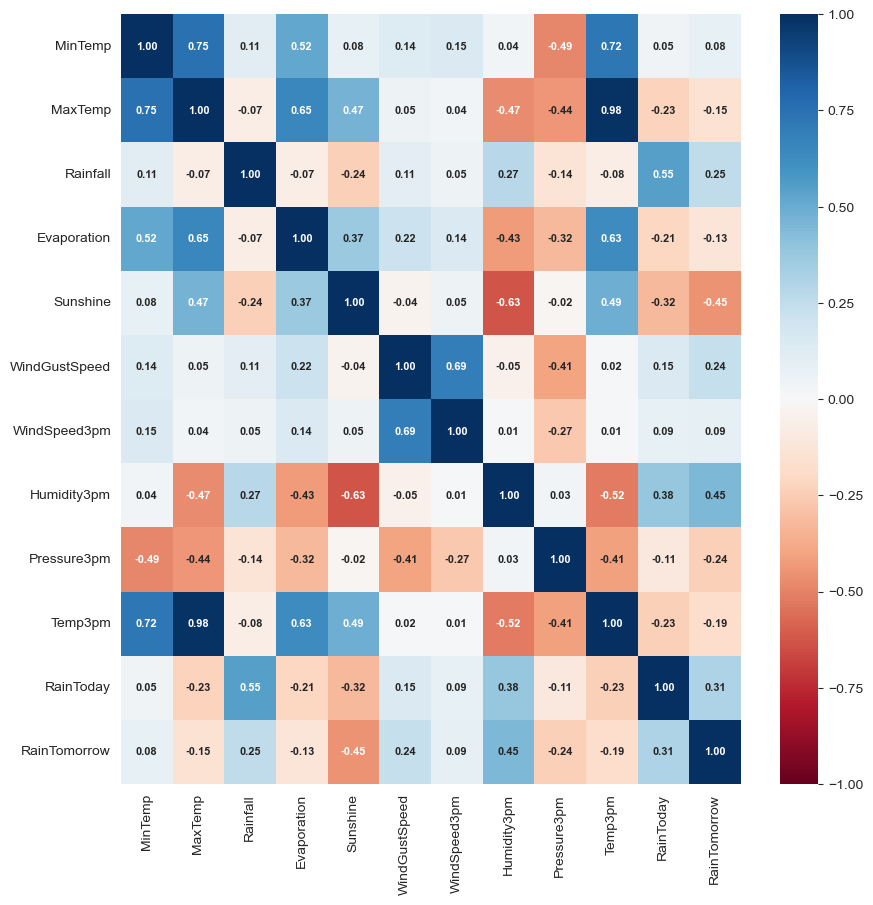

In [18]:
plt.figure(figsize = (10, 10))
sns.heatmap(aus_rain_clmod.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':8, 'fontweight':'bold'}, fmt=".2f")

In [19]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clmod['Humidity9am'],aus_rain_clmod['Pressure9am'],s=5, c=aus_rain_clmod['RainToday'],cmap=GnRd)
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.title('Prediction whether it will rain today (Red is yes)')

KeyError: 'Humidity9am'

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Humidity9am'],aus_rain_clean['WindGustSpeed'],s=5, c=aus_rain_clean['RainToday'],cmap=GnRd)
plt.xlabel('Humidity')
plt.ylabel('Wind Gust Speed')
plt.title('Prediction whether it will rain today (Red is yes)')

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Humidity9am'],aus_rain_clean['MaxTemp'],s=5, c=aus_rain_clean['RainToday'],cmap=GnRd)
plt.xlabel('Humidity')
plt.ylabel('MaxTemp')
plt.title('Prediction whether it will rain today (Red is yes)')

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['Humidity9am'],aus_rain_clean['MinTemp'],s=5, c=aus_rain_clean['RainToday'],cmap=GnRd)
plt.xlabel('Humidity')
plt.ylabel('MinTemp')
plt.title('Prediction whether it will rain today (Red is yes)')

In [ ]:
aus_rain_clean['pressured']=aus_rain_clean['Pressure3pm']-aus_rain_clean['Pressure9am']
aus_rain_clean['Tempd']=aus_rain_clean['Temp3pm']-aus_rain_clean['Temp9am']

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(aus_rain_clean['pressured'],aus_rain_clean['Tempd'],s=5, c=aus_rain_clean['RainToday'],cmap=GnRd)
plt.xlabel('Pressure derivitive')
plt.ylabel('Tempurature derivitive')
plt.title('Prediction whether it will rain today (Red is yes)')

The Ml Portion

In [59]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [60]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:


# load the dataset, split into input (X) and output (y) variables
aus_rain_clmod

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,20.0,13.0,1004.4,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,8.0,1012.1,27.0,0,0
6051,15.5,34.1,0.0,12.6,13.3,30.0,7.0,7.0,1011.6,32.7,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,15.0,22.0,1009.2,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,22.0,1009.1,35.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,20.0,32.0,1010.5,32.3,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,11.0,28.0,1011.2,32.0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,11.0,23.0,1011.8,32.1,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,17.0,58.0,1010.7,29.2,0,0


In [21]:
X_df=aus_rain_clmod[['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm','WindSpeed3pm','Humidity3pm','Temp3pm','RainToday']]
y_df=aus_rain_clmod['RainTomorrow']
# X= torch.tensor(X.values)
# Y= torch.tensor(Y.values)
X = X_df.to_numpy()
y = y_df.to_numpy()


In [63]:

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
X.shape
y.shape

torch.Size([65635, 1])

In [64]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.0494956374168396
Finished epoch 1, latest loss 0.04826410114765167
Finished epoch 2, latest loss 0.04356372356414795
Finished epoch 3, latest loss 0.044668328016996384
Finished epoch 4, latest loss 0.051200173795223236
Finished epoch 5, latest loss 0.04612472653388977
Finished epoch 6, latest loss 0.0471646785736084
Finished epoch 7, latest loss 0.04489164426922798
Finished epoch 8, latest loss 0.04190823435783386
Finished epoch 9, latest loss 0.047338828444480896
Finished epoch 10, latest loss 0.043587297201156616
Finished epoch 11, latest loss 0.04277975857257843
Finished epoch 12, latest loss 0.03981122374534607
Finished epoch 13, latest loss 0.03799337148666382
Finished epoch 14, latest loss 0.04542586952447891
Finished epoch 15, latest loss 0.0463639572262764
Finished epoch 16, latest loss 0.0425926148891449
Finished epoch 17, latest loss 0.04087720066308975
Finished epoch 18, latest loss 0.04007351025938988
Finished epoch 19, latest loss 0.03844932

In [68]:
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(50):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


Accuracy 0.8425382971763611
[17.899999618530273, 35.20000076293945, 48.0, 1004.4000244140625, 20.0, 13.0, 33.400001525878906, 0.0] => 0 (expected 0)
[18.399999618530273, 28.899999618530273, 37.0, 1012.0999755859375, 19.0, 8.0, 27.0, 0.0] => 0 (expected 0)
[15.5, 34.099998474121094, 30.0, 1011.5999755859375, 7.0, 7.0, 32.70000076293945, 0.0] => 0 (expected 0)
[19.399999618530273, 37.599998474121094, 46.0, 1009.2000122070312, 15.0, 22.0, 34.900001525878906, 0.0] => 0 (expected 0)
[21.899999618530273, 38.400001525878906, 31.0, 1009.0999755859375, 6.0, 22.0, 35.599998474121094, 0.0] => 0 (expected 0)
[24.200000762939453, 41.0, 35.0, 1007.4000244140625, 13.0, 15.0, 37.599998474121094, 0.0] => 0 (expected 0)
[27.100000381469727, 36.099998474121094, 43.0, 1007.4000244140625, 20.0, 19.0, 34.29999923706055, 0.0] => 0 (expected 0)
[23.299999237060547, 34.0, 41.0, 1009.9000244140625, 19.0, 15.0, 31.5, 0.0] => 0 (expected 0)
[16.100000381469727, 34.20000076293945, 37.0, 1009.2000122070312, 6.0, 9.

In [72]:
column_names=['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm','WindSpeed3pm','Humidity3pm','Temp3pm','RainToday']
X_back=pd.DataFrame(X.numpy(),columns=column_names)
X_back['predictions']=predictions.numpy()
X_back['actual']=y.numpy()
X_back['iscorrect']= X_back['predictions'] == X_back['actual']
X_back['iscorrect'] = X_back['iscorrect'].apply(lambda x: 0 if x == False else 1)
X_back

,MinTemp,MaxTemp,WindGustSpeed,Pressure3pm,WindSpeed3pm,Humidity3pm,Temp3pm,RainToday,predictions,actual,iscorrect
0,17.900000,35.200001,48.0,1004.400024,20.0,13.0,33.400002,0.0,0,0.0,1
1,18.400000,28.900000,37.0,1012.099976,19.0,8.0,27.000000,0.0,0,0.0,1
2,15.500000,34.099998,30.0,1011.599976,7.0,7.0,32.700001,0.0,0,0.0,1
3,19.400000,37.599998,46.0,1009.200012,15.0,22.0,34.900002,0.0,0,0.0,1
4,21.900000,38.400002,31.0,1009.099976,6.0,22.0,35.599998,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
65630,19.299999,33.400002,35.0,1010.500000,20.0,32.0,32.299999,0.0,0,0.0,1
65631,21.200001,32.599998,37.0,1011.200012,11.0,28.0,32.000000,0.0,0,0.0,1
65632,20.700001,32.799999,33.0,1011.799988,11.0,23.0,32.099998,0.0,0,0.0,1
65633,19.500000,31.799999,26.0,1010.700012,17.0,58.0,29.200001,0.0,0,0.0,1


Text(0.5, 1.0, 'Predictions whether it will rain today (Green are correct predictions)')

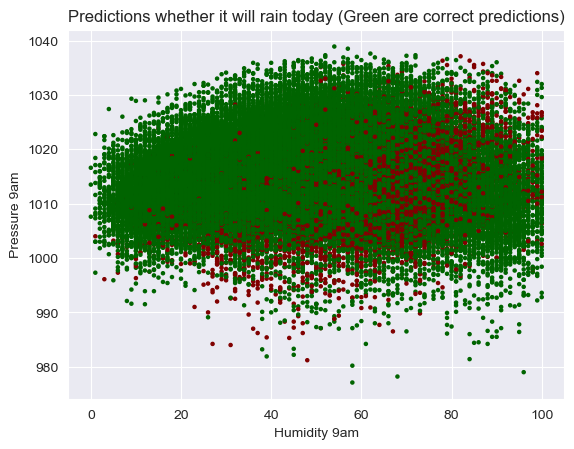

In [145]:
c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
c.reverse()
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(X_back['Humidity3pm'],X_back['Pressure3pm'],s=5, c=X_back['iscorrect'],cmap=GnRd)
plt.xlabel('Humidity 9am')
plt.ylabel('Pressure 9am')
plt.title('Predictions whether it will rain today (Green are correct predictions)')

In [41]:
X_df=aus_rain_clmod[['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm','WindSpeed3pm','Humidity3pm','Temp3pm','RainToday']]
y_df2=aus_rain_clmod['Rainfall']
lab_enc = preprocessing.LabelEncoder()
y_df = lab_enc.fit_transform(y_df2)

Random Forest

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

C:\Users\Owen\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [43]:
predictions = rf_model.predict(X_test)
predictions
rf_model.score(X_test,y_test)

0.6490782591031435

In [60]:
eframe=X_test
eframe["rainfall"]=y_test
eframe['predict']=predictions
eframe["iscorrect"]=eframe['predict'].between(eframe['rainfall']-30, eframe['rainfall']+30,inclusive = False)
#eframe['iscorrect']= eframe['predict'] == eframe['rainfall']
eframe['iscorrect'] = eframe['iscorrect'].apply(lambda x: 0 if x == False else 1)


C:\Users\Owen\AppData\Local\Temp\ipykernel_29216\1358227684.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  eframe["iscorrect"]=eframe['predict'].between(eframe['rainfall']-30, eframe['rainfall']+30,inclusive = False)


In [61]:
eframe

,MinTemp,MaxTemp,WindGustSpeed,Pressure3pm,WindSpeed3pm,Humidity3pm,Temp3pm,RainToday,rain_tomorrow,predict,iscorrect,rainfall
70489,7.5,22.1,39.0,1026.0,22.0,30.0,21.3,0,0,0,1,0
13526,21.0,29.1,30.0,1013.5,15.0,43.0,27.3,0,0,0,1,0
12365,16.3,22.5,41.0,1011.8,19.0,92.0,17.7,0,0,0,1,0
82991,2.7,17.8,31.0,1017.9,19.0,69.0,16.3,0,0,0,1,0
132268,4.7,12.1,37.0,1026.0,17.0,66.0,11.3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
141874,24.9,35.9,41.0,1009.0,22.0,26.0,34.8,0,0,0,1,0
103192,7.9,20.9,37.0,1021.6,17.0,28.0,19.9,0,0,0,1,0
78555,3.1,13.1,17.0,1028.8,7.0,82.0,11.8,1,54,14,0,54
67315,10.3,25.3,46.0,1016.9,26.0,18.0,24.6,0,0,0,1,0


Text(0.5, 1.0, 'Wether the predicted amount is within 30+/-mil of the actual amount.  (Green are correct predictions)')

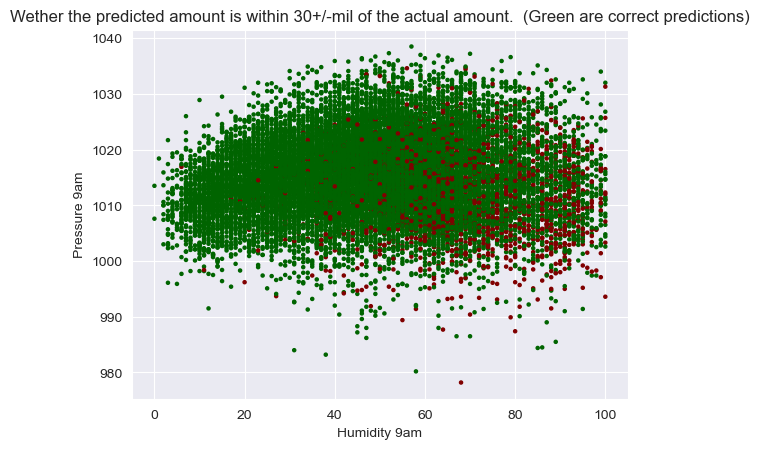

In [62]:
c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
c.reverse()
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(eframe['Humidity3pm'],eframe['Pressure3pm'],s=5, c=eframe['iscorrect'],cmap=GnRd)
plt.xlabel('Humidity 9am')
plt.ylabel('Pressure 9am')
plt.title('Wether the predicted amount is within 30+/-mil of the actual amount.  (Green are correct predictions)')

In [65]:

eframe['iscorrect'].value_counts()[1]/eframe['iscorrect'].count()

0.8957391701792697

In [24]:
Lgmod=LinearRegression()
Lgmod.fit(X_train,y_train)
predict=Lgmod.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- iscorrect
- predict
- rain_tomorrow


In [49]:
eframe=X_test
eframe["rain_tomorrow"]=y_test
eframe['predict']=predict
eframe['predict'] = eframe['predict'].apply(lambda x: 0 if x < 0.3 else 1)
eframe['iscorrect']= eframe['predict'] == eframe['rain_tomorrow']
eframe['iscorrect'] = eframe['iscorrect'].apply(lambda x: 0 if x == False else 1)
eframe

,MinTemp,MaxTemp,WindGustSpeed,Pressure3pm,WindSpeed3pm,Humidity3pm,Temp3pm,RainToday,rain_tomorrow,predict,iscorrect
70489,7.5,22.1,39.0,1026.0,22.0,30.0,21.3,0,0,0,1
13526,21.0,29.1,30.0,1013.5,15.0,43.0,27.3,0,0,0,1
12365,16.3,22.5,41.0,1011.8,19.0,92.0,17.7,0,1,1,1
82991,2.7,17.8,31.0,1017.9,19.0,69.0,16.3,0,1,1,1
132268,4.7,12.1,37.0,1026.0,17.0,66.0,11.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
141874,24.9,35.9,41.0,1009.0,22.0,26.0,34.8,0,0,0,1
103192,7.9,20.9,37.0,1021.6,17.0,28.0,19.9,0,0,0,1
78555,3.1,13.1,17.0,1028.8,7.0,82.0,11.8,1,0,1,0
67315,10.3,25.3,46.0,1016.9,26.0,18.0,24.6,0,0,0,1


Text(0.5, 1.0, 'Predictions whether it will rain today (Green are correct predictions)')

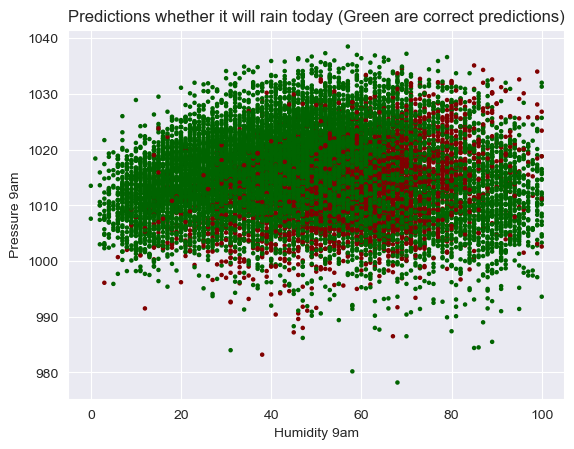

In [50]:
c = ["darkgreen","forestgreen","green","limegreen","palegreen","salmon","lightcoral","red","darkred","maroon"]
c.reverse()
GnRd=LinearSegmentedColormap.from_list('gr',c, N=256)

plt.scatter(eframe['Humidity3pm'],eframe['Pressure3pm'],s=5, c=eframe['iscorrect'],cmap=GnRd)
plt.xlabel('Humidity 9am')
plt.ylabel('Pressure 9am')
plt.title('Predictions whether it will rain today (Green are correct predictions)')

In [25]:
Lgmod.score(y_test,X_test)
Lgmod.score(y_test,X_test)

C:\Users\Owen\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 1 ... 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
X_df=aus_rain_clmod[['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm','WindSpeed3pm','Humidity3pm','Temp3pm','RainToday']]
y_df=aus_rain_clmod['Rainfall']
# X= torch.tensor(X.values)
# Y= torch.tensor(Y.values)
X = X_df.to_numpy()
y = y_df.to_numpy()


In [21]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [26]:
Lgmod.score(X_test,y_test)

0.32894483595134205

In [ ]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 100.0
Finished epoch 1, latest loss 100.0


In [ ]:
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

predictions = (model(X) > 0.5).int()
for i in range(50):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))